# Pymaceuticals Inc.

---

### Analysis

In this notebook, we will analyze the results of a study that tested the effectiveness of different drug regimens on the treatment of squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. The study was conducted on 249 mice over the course of 45 days.


In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID") # The datasets are merged into a single DataFrame. (6 points)

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
# Checking the number of mice.
mice_count = df["Mouse ID"].nunique()
print(f"mice_count: {mice_count}") #The number of mice are shown from the merged DataFrame. (2 points)

mice_count: 249


In [67]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"])] #Each duplicate mice is found based on the Mouse ID and Timepoint. (6 points)

In [68]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = df[df["Mouse ID"] == "g989"]

In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df["Mouse ID"] != "g989"] #A clean DataFrame is created with the dropped duplicate mice. (4 points)

In [72]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice_count = clean_df["Mouse ID"].nunique()
print(f"clean_df_mice_count: {clean_df_mice_count}") #The number of mice are shown from the clean DataFrame. (2 points)

clean_df_mice_count: 248


## Summary Statistics


In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean() #The mean of the tumor volume for each regimen is calculated using groupby. (2 points)
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() #The median of the tumor volume for each regimen is calculated using groupby. (2 points)
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var() #The variance of the tumor volume for each regimen is calculated using groupby. (2 points)
std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std() #The standard deviation of the tumor volume for each regimen is calculated using groupby. (2 points)
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem() #The SEM of the tumor volume for each regimen is calculated using groupby. (2 points)


summary_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std_dev,
    "SEM": sem
}) #A new DataFrame is created with using the summary statistics. (5 points)


In [75]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

## Bar and Pie Charts


<Axes: title={'center': 'Number of Mouse ID/Timepoints for each Drug Regimen'}, xlabel='Drug Regimen'>

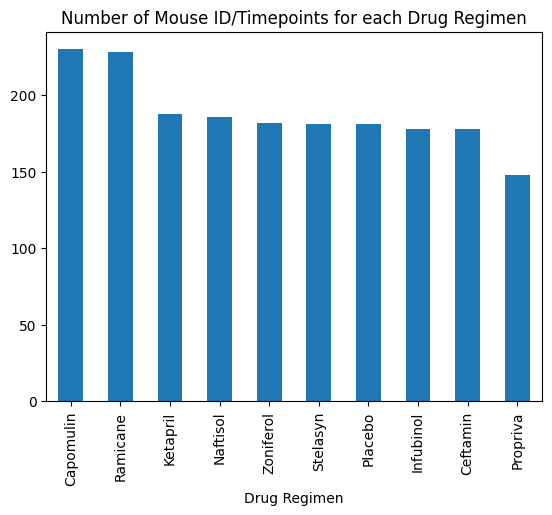

In [76]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().plot(kind="bar", title="Number of Mouse ID/Timepoints for each Drug Regimen") #A bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas is generated. (4.5 points)


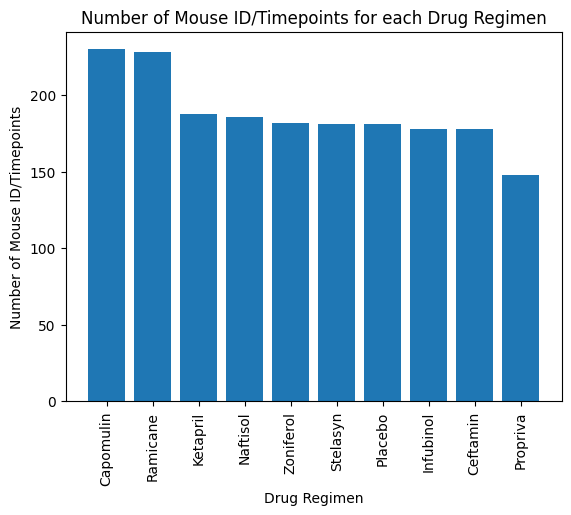

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(clean_df["Drug Regimen"].value_counts().index, clean_df["Drug Regimen"].value_counts()) #A bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot is generated. (4.5 points)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.title("Number of Mouse ID/Timepoints for each Drug Regimen")
plt.show()


<Axes: title={'center': 'Sex of mice in the study'}, ylabel='count'>

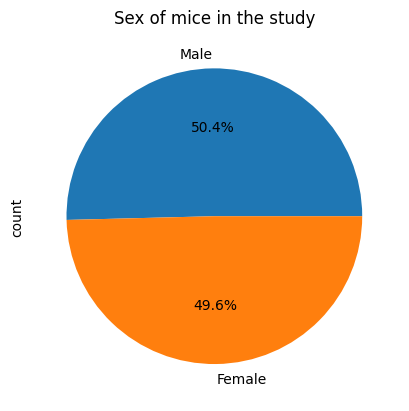

In [77]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df.drop_duplicates(subset="Mouse ID")

# Make the pie chart
unique_mice['Sex'].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Sex of mice in the study") #A pie chart showing the distribution of unique female versus male mice using Pandas is generated. (3 points)

Text(0.5, 1.0, 'sex of mice in the study')

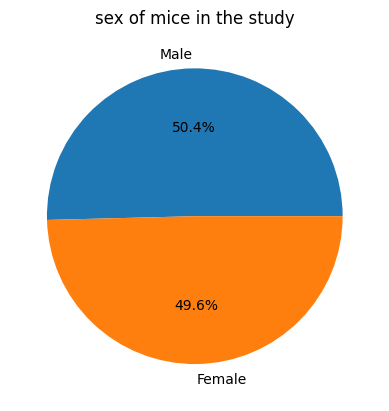

In [78]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df.drop_duplicates(subset="Mouse ID")

# Make the pie chart
plt.pie(unique_mice["Sex"].value_counts(), labels=unique_mice["Sex"].value_counts().index, autopct="%1.1f%%") #A pie chart showing the distribution of unique female versus male mice using pyplot is generated. (3 points)
plt.title("sex of mice in the study")

## Quartiles, Outliers and Boxplots


In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max() #A DatFrame that has the last timepoint for each mouse ID is created using groupby. (5 points) Retrieve the maximum timepoint for each mouse. (2 points)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint, clean_df, on=["Mouse ID", "Timepoint"]) # note the order: rows which have mouse ID and timepoint not in last_timepoint will be dropped

last_timepoint.reset_index(drop=True, inplace=True) #The index of the DataFrame is reset. (2 points)


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] #The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list. (3 points)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [] #An empty list is created to fill with tumor volume data. (3 points)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_df = last_timepoint_df[last_timepoint_df["Drug Regimen"] == treatment]
    # add subset
    tumor_vol_data.append(tumor_df["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quantiles = tumor_df["Tumor Volume (mm3)"].quantile([.25,.75])
    Q1 = quantiles[.25]
    Q3 = quantiles[.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = tumor_df[(tumor_df["Tumor Volume (mm3)"] < lower_bound) | (tumor_df["Tumor Volume (mm3)"] > upper_bound)]
    print(f"--------------------Treatment: {treatment}--------------------\nIQR:{IQR}\nOutliers:{outliers['Mouse ID'].to_list()}") # A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group (10 points)


--------------------Treatment: Capomulin--------------------
IQR:7.781863460000004
Outliers:[]
--------------------Treatment: Ramicane--------------------
IQR:9.098536719999998
Outliers:[]
--------------------Treatment: Infubinol--------------------
IQR:11.477135160000003
Outliers:['c326']
--------------------Treatment: Ceftamin--------------------
IQR:15.577752179999997
Outliers:[]


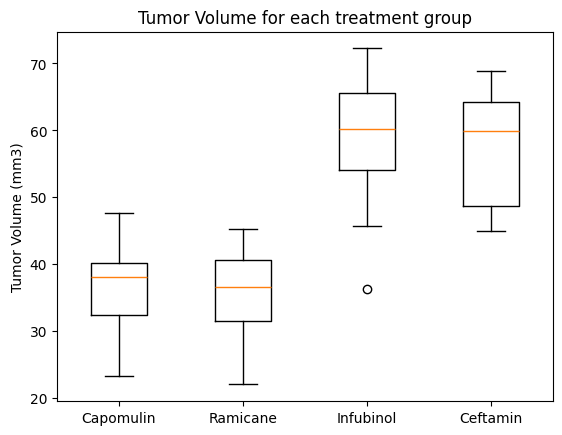

In [83]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, tick_labels=treatments)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for each treatment group")
plt.show() #A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group. (5 points)

## Line and Scatter Plots


Text(0.5, 1.0, 'Tumor Volume vs. Timepoint for mouse x401')

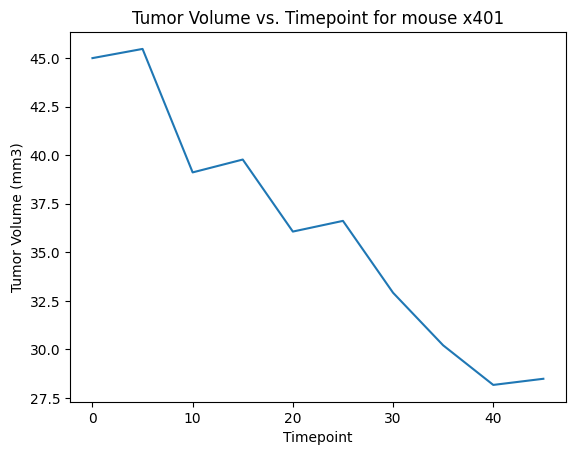

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
camplin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
mouse = camplin_df["Mouse ID"].sample(1).values[0] # get a random mouse
mouse_df= camplin_df[camplin_df["Mouse ID"] == mouse]
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for mouse {mouse}") #A line plot is generated that shows the tumor volume vs. time point for one mouse treated with Capomulin. (5 points)


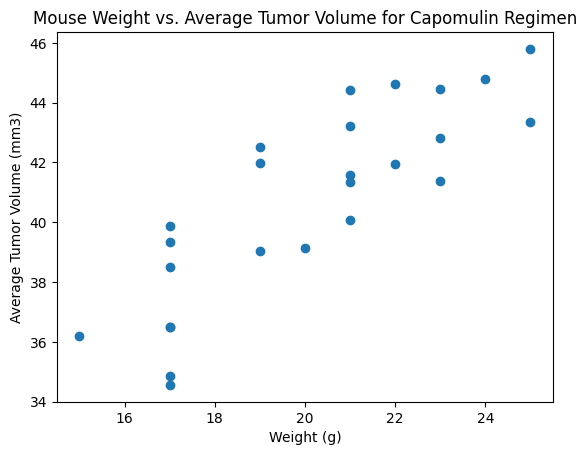

In [84]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = camplin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = camplin_df.groupby("Mouse ID")["Weight (g)"].first() # weight is constant for each mouse
plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show() #A scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen. (5 points)

## Correlation and Regression


Correlation: 0.8419363424694721


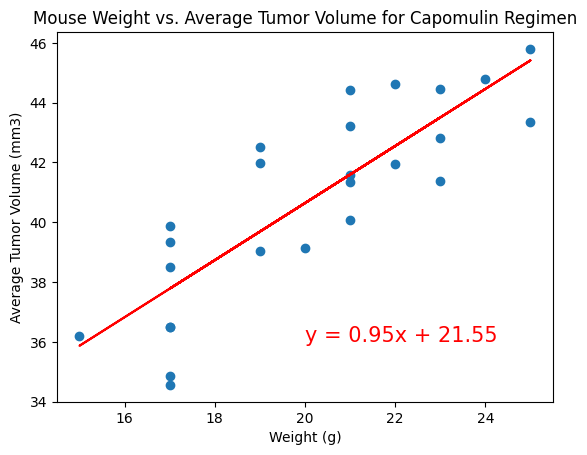

In [86]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)[0]
print(f"Correlation: {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept 
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(mouse_weight, regress_values, color="red")
plt.scatter(mouse_weight, avg_tumor_vol)
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()#The correlation coefficient and linear regression model are calculated for mouse weight and average tumor volume for the Capomulin regimen. (10 points)


